In [136]:
from typing import List, Optional
import os
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns


In [3]:
from pathlib import Path
import pyrootutils

notebook_path = Path(os.path.abspath(""))
pyrootutils.setup_root(notebook_path, indicator=".project-root", pythonpath=True)

DIRNAME = r"/cluster/home/vjimenez/adv_pa_new/results/posteriors/"

In [5]:
with open(r"/cluster/home/vjimenez/adv_pa_new/results/posteriors/CGO_1_hue_0_irm.pkl", "rb") as file:
    posterior_dict = pickle.load(file)

posterior_dict

/cluster/project/jbuhmann/posterior_agreement/.venvs/adv_pa/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'stored_x_mean': tensor([9.9974e-01, 2.6199e-04, 2.8160e-06]),
 'stored_x_std': tensor([8.1814e-03, 8.1784e-03, 7.5645e-05]),
 'stored_xbeta_mean': tensor([0.3333, 0.3333, 0.3333]),
 'stored_xbeta_std': tensor([nan, nan, nan])}

In [67]:
dataset_names = [
    ["ZGO_hue_3", "CGO_1_hue", "CGO_2_hue", "CGO_3_hue", "ZSO_hue_3"],
    ["ZGO_pos_3", "CGO_1_pos", "CGO_2_pos", "CGO_3_pos", "ZSO_pos_3"]
]

dataset_names_parsed = ["ZGO", "1-CGO", "2-CGO", "3-CGO", "ZSO"]

xaxis_names = [
    ["Test 0"],
    ["Test 1", "Test 2", "Test 3", "Test 4", "Test 5"]
]

factor_name = ["Hue", "Position"]

COLORS_DICT = {
    "erm": "tab:blue",
    "irm": "tab:orange",
    "lisa": "tab:green"
}

In [132]:
def plot_posteriors_SOGO(
        savefilename: str,
        save: bool = False,
    ):

    # Get the font
    fontname = "DejaVu Serif"
    _ = fm.findfont(fm.FontProperties(family=fontname))
    fontsize = 18

    for ifactor in range(2):
        for model in ["erm", "irm"]:
            numbars = 5

            _, ax = plt.subplots(figsize=(0.5 * numbars * 3.861, 2 * 2.7291))
            sns.set(font_scale=1.9)
            plt.rcParams["font.family"] = "serif"
            plt.rcParams["font.serif"] = fontname
            sns.set_style("ticks")

            delta, barwidth = 0.175, 0.35
            x_poses = []
            for idataset, ds_name in enumerate(dataset_names[ifactor]):
                pos_x = idataset - idataset*0.2
                x_poses.append(pos_x)

                # with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_{ds_index}_{model}.pkl", "rb") as file:
                with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_0_{model}.pkl", "rb") as file:
                    posterior_dict0 = pickle.load(file)
                with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_1_{model}.pkl", "rb") as file:
                    posterior_dict1 = pickle.load(file)
            
            
                color = COLORS_DICT[model]

                # x_beta_1, y_beta_1, err_beta_1 = [pos_x - delta], [posterior_dict["stored_x_mean"][0].item()], [posterior_dict["stored_x_std"][0].item()]
                x_beta_1, y_beta_1, err_beta_1 = [pos_x - delta], [posterior_dict0["stored_x_mean"][0].item()], [posterior_dict0["stored_x_std"][0].item()]
                h1 = ax.bar(x_beta_1, y_beta_1, width=barwidth, color=color) 
                ax.bar(
                    x = x_beta_1,
                    align = "center",
                    height = y_beta_1,
                    facecolor='none',
                    edgecolor='none',
                    color='black',
                    yerr=[
                        err if y+err <= 1 else 1-y
                        for err, y in zip(err_beta_1, y_beta_1)
                    ],
                    capsize=3
                )
            

                # x_beta_2, y_beta_2, err_beta_2 = [pos_x + delta], [posterior_dict["stored_xbeta_mean"][0].item()], [posterior_dict["stored_xbeta_std"][0].item()]
                x_beta_2, y_beta_2, err_beta_2 = [pos_x + delta], [posterior_dict1["stored_x_mean"][0].item()], [posterior_dict1["stored_x_std"][0].item()]
                ax.bar(x_beta_2, y_beta_2, width=barwidth, color="white") # to hide the lines behiind
                h2 = ax.bar(x_beta_2, y_beta_2, width=barwidth, alpha=0.6, hatch="/", color=color) 
                ax.bar(
                    x = x_beta_2,
                    align = "center",
                    height = y_beta_2,
                    facecolor='none',
                    edgecolor='none',
                    color='black',
                    yerr=np.asarray([
                        [err, err] if y+err <= 1 else [err, 1-y]
                        for err, y in zip(err_beta_2, y_beta_2)
                    ]).T,
                    capsize=3
                )

            # Create a legend
            handles = [
                ax.bar([numbars + 10], [0.5], width=barwidth, color="tab:gray"),
                ax.bar([numbars + 10], [0.5], width=barwidth, alpha=0.6, hatch="/", color="tab:gray") 
            ]
            labels = [
                r"$\mathbf{P}(\hat{y}_0 \mid \mathbf{x}_0^{test})$",
                r"$\mathbf{P}(\hat{y}_1 \mid \mathbf{x}_1^{test})$"
            ]
            ax.legend(
                # title=LABEL_DICT[defense],
                handles = handles,
                labels=labels,
                loc="lower right",
                handlelength=1.5,
                framealpha = 1.0,
                prop={
                    "family": fontname,
                    'size': 14,
                },
            )

            # Finish the plot:
            ax.set_xticks(x_poses)
            ax.set_xticklabels(
                dataset_names_parsed,
                fontname=fontname,
            )
            ax.tick_params(axis="both", which="both", direction="in")
            ax.tick_params(axis='x', length=0) # hide ticks
            # plt.xticks(rotation=45)

            xticks_font = fm.FontProperties(family=fontname)
            for tick in ax.get_xticklabels():
                tick.set_fontproperties(xticks_font)
                tick.set_fontsize(fontsize)

            ax.set_yticks(np.arange(0.0, 1.2, 0.1))
            ax.set_ylim(
                [0.7, 1.02] if ifactor == 0 else [0.8, 1.02]
            )
            ax.set_xlim(-barwidth - delta, (numbars - 1 - 0.2*(numbars - 1)) + delta + barwidth)
            ax.grid(linestyle="--", axis="y")
        
            ax.set_title(rf"{factor_name[ifactor]} — {model.upper()}, $\beta$ = 1", fontname=fontname)            
            ax.set_ylabel(r"Avg. conditional $\mathbf{P}(\hat{y})$", fontname=fontname)
                
            plt.tight_layout()
            if save:
                savepath = os.path.join(DIRNAME, f"{savefilename}_{model}_{factor_name[ifactor].lower()}.pdf")
                plt.savefig(savepath, dpi=300)
                plt.clf()
            else:
                plt.show()
            plt.close()

In [134]:
plot_posteriors_SOGO(
        savefilename = "posterior",
        save = True,
    )

In [175]:
def plot_posteriors_paper(
        ds_name: str,
        savefilename: str,
        save: bool = False,
    ):

    # Get the font
    fontname = "DejaVu Serif"
    _ = fm.findfont(fm.FontProperties(family=fontname))
    fontsize = 18

    numbars = 5
    _, ax = plt.subplots(figsize=(0.5 * numbars * 3.861, 2 * 2.7291))
    sns.set(font_scale=1.9)
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = fontname
    sns.set_style("ticks")
    
    for imodel, (model, pos) in enumerate(zip(["erm", "irm", "lisa"], [-0.1, 0.0, +0.1])):
        delta, barwidth = 0.175, 0.35

        x_poses = []
        for idataset in range(1, 6):
            pos_x = idataset + pos
            x_poses.append(pos_x)

            # with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_{ds_index}_{model}.pkl", "rb") as file:
            with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_{idataset}_{model}.pkl", "rb") as file:
                posterior_dict = pickle.load(file)
        
        
            color = COLORS_DICT[model]

            if imodel < 2:
                x_beta_1, y_beta_1, err_beta_1 = [pos_x - delta], [posterior_dict["stored_x_mean"][0].item()], [posterior_dict["stored_x_std"][0].item()]
                h1 = ax.bar(x_beta_1, y_beta_1, width=barwidth, color=color) 
                ax.bar(
                    x = x_beta_1,
                    align = "center",
                    height = y_beta_1,
                    facecolor='none',
                    edgecolor='none',
                    color='black',
                    yerr=[
                        err if y+err <= 1 else 1-y
                        for err, y in zip(err_beta_1, y_beta_1)
                    ],
                    capsize=3
                )

            else:
                x_beta_2, y_beta_2, err_beta_2 = [pos_x + delta], [posterior_dict["stored_x_mean"][0].item()], [posterior_dict["stored_x_std"][0].item()]
                ax.bar(x_beta_2, y_beta_2, width=barwidth, color="white") # to hide the lines behiind
                h2 = ax.bar(x_beta_2, y_beta_2, width=barwidth, alpha=0.6, hatch="/", color=color) 
                ax.bar(
                    x = x_beta_2,
                    align = "center",
                    height = y_beta_2,
                    facecolor='none',
                    edgecolor='none',
                    color='black',
                    yerr=np.asarray([
                        [err, err] if y+err <= 1 else [err, 1-y]
                        for err, y in zip(err_beta_2, y_beta_2)
                    ]).T,
                    capsize=3
                )

    # Create a legend
    handles = [
        ax.bar([numbars + 10], [0.5], width=barwidth, color="tab:gray"),
        ax.bar([numbars + 10], [0.5], width=barwidth, alpha=0.6, hatch="/", color="tab:gray") 
    ]
    labels = [
        r"$\mathbf{P}(\hat{y}_0 \mid \mathbf{x}_0^{test})$",
        r"$\mathbf{P}(\hat{y}_1 \mid \mathbf{x}_1^{test})$"
    ]
    ax.legend(
        # title=LABEL_DICT[defense],
        handles = handles,
        labels=labels,
        loc="lower right",
        handlelength=1.5,
        framealpha = 1.0,
        prop={
            "family": fontname,
            'size': 14,
        },
    )

    # Finish the plot:
    # ax.set_xticks(x_poses)
    # ax.set_xticklabels(
    #     dataset_names_parsed,
    #     fontname=fontname,
    # )
    ax.tick_params(axis="both", which="both", direction="in")
    ax.tick_params(axis='x', length=0) # hide ticks
    # plt.xticks(rotation=45)

    xticks_font = fm.FontProperties(family=fontname)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(xticks_font)
        tick.set_fontsize(fontsize)

    ax.set_yticks(np.arange(0.0, 1.2, 0.1))
    ax.set_ylim(0.94, 1.02)
    # ax.set_ylim(
    #     [0.7, 1.02] if ifactor == 0 else [0.8, 1.02]
    # )
    ax.set_xlim(-barwidth - delta, (numbars - 1 - 0.2*(numbars - 1)) + delta + barwidth)
    ax.grid(linestyle="--", axis="y")

    # ax.set_title(rf"{factor_name[ifactor]} — {model.upper()}, $\beta$ = 1", fontname=fontname)            
    ax.set_ylabel(r"Avg. conditional $\mathbf{P}(\hat{y})$", fontname=fontname)
        
    plt.tight_layout()
    if save:
        # savepath = os.path.join(DIRNAME, f"{savefilename}_{model}_{factor_name[ifactor].lower()}.pdf")
        plt.savefig(savepath, dpi=300)
        plt.clf()
    else:
        plt.show()
    plt.close()

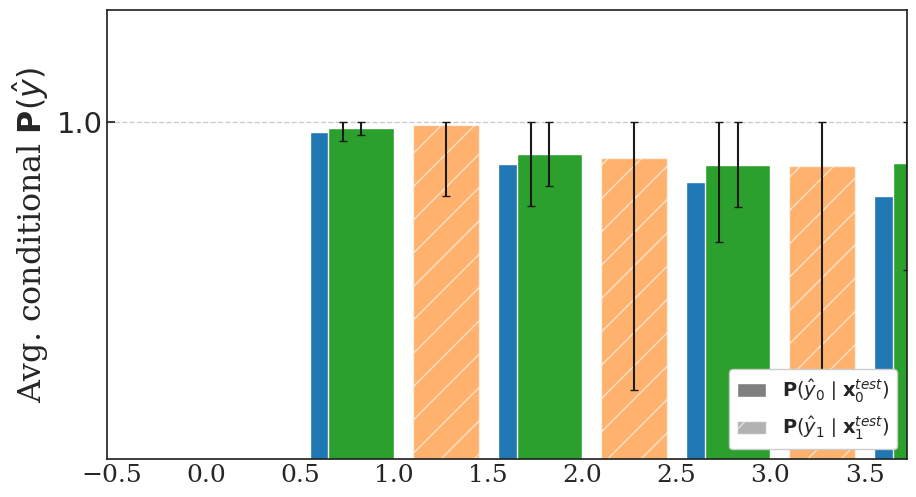

In [176]:
plot_posteriors_paper(
        ds_name = "paper",
        savefilename = "foo",
        save = False,
)